# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

weather_api_key = "76772c199c5133884b0d7fe483babcdf"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [114]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [115]:
# Generate output data from API pull for cities
output_df = pd.DataFrame([])
for cit_num in range(len(cities)):
    response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={cities[cit_num]}&appid={weather_api_key}").json()

    try:
        output_df.loc[cit_num,["City"]] = response["name"]
        output_df.loc[cit_num,["Lat"]] = response["coord"]["lat"]
        output_df.loc[cit_num,["Lng"]] = response["coord"]["lon"]
        output_df.loc[cit_num,["Max Temp"]] = response["main"]["temp_max"]
        output_df.loc[cit_num,["Humidity"]] = response["main"]["humidity"]
        output_df.loc[cit_num,["Cloudiness"]] = response["clouds"]["all"]
        output_df.loc[cit_num,["Wind Speed"]] = response["wind"]["speed"]
        output_df.loc[cit_num,["Country"]] = response["sys"]["country"]
        output_df.loc[cit_num,["Date"]] = response["dt"]
    
        print(output_df.loc[[cit_num]])
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    
    
        


      City   Lat   Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
0  Ushuaia -54.8 -68.3    271.15      86.0        75.0        11.3      AR   

           Date  
0  1.598809e+09  
     City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
1  Papara -3.98 -38.73    303.15      58.0        42.0        10.8      BR   

           Date  
1  1.598809e+09  
           City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
2  Punta Arenas -53.15 -70.92    275.15      47.0        75.0         9.8   

  Country          Date  
2      CL  1.598809e+09  
    City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
3  Vaini -21.2 -175.2    297.15      88.0        20.0         4.1      TO   

           Date  
3  1.598809e+09  
          City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
4  East London -33.02  27.91    284.15      62.0        30.0         4.6   

  Country          Date  
4      ZA  1.598809e+09  
Missing fie

       City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
45  Te Anau -45.42  167.72    282.04      74.0        53.0        4.74   

   Country          Date  
45      NZ  1.598809e+09  
          City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
46  Pedernales  18.04 -71.74    306.15      59.0        20.0         6.2   

   Country          Date  
46      DO  1.598809e+09  
       City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
47  Isangel -19.55  169.27    293.29      83.0        98.0        5.64   

   Country          Date  
47      VU  1.598809e+09  
      City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
48  Torbay  47.67 -52.73    293.71     100.0        90.0        10.3      CA   

            Date  
48  1.598809e+09  
     City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
49  Korla  41.76  86.15    297.04      62.0         6.0        1.79      CN   

            Date  
49  1.5988

      City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
89  Kobryn  52.21  24.36    296.83      72.0         0.0        3.59      BY   

            Date  
89  1.598809e+09  
     City   Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
90  Pevek  69.7  170.31    275.53      86.0        66.0        1.48      RU   

            Date  
90  1.598809e+09  
       City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
91  Mataura -46.19  168.86    280.37      72.0        47.0        4.92   

   Country          Date  
91      NZ  1.598809e+09  
      City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
92  Satara  17.68  73.98    293.82      92.0       100.0        1.89      IN   

            Date  
92  1.598809e+09  
          City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
93  Voroshnëvo  51.65  36.02    295.15      49.0         0.0         3.0   

   Country          Date  
93      RU  1.598809e+

Missing field/result... skipping.
     City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
135  Lebu -37.62 -73.65    283.31      65.0         0.0       10.21      CL   

             Date  
135  1.598809e+09  
             City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
136  North Platte  41.12 -100.77    300.15      57.0        40.0         6.7   

    Country          Date  
136      US  1.598809e+09  
      City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
137  Alofi -19.06 -169.92    292.15     100.0        36.0         1.5      NU   

             Date  
137  1.598809e+09  
        City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
138  Husavik  66.04 -17.34    290.15      55.0        75.0        10.8   

    Country          Date  
138      IS  1.598809e+09  
      City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
139  Khovd  48.01  91.64    286.32      54.0        10.0      

                       City    Lat   Lng  Max Temp  Humidity  Cloudiness  \
177  Santa Cruz de Barahona  18.21 -71.1    306.15      59.0        20.0   

     Wind Speed Country          Date  
177         6.2      DO  1.598810e+09  
                City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
178  Nieuw Amsterdam  5.88 -55.08    306.15      55.0        40.0         3.1   

    Country          Date  
178      SR  1.598810e+09  
        City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
179  Sørland  67.67  12.69    283.15      61.0        40.0         3.6   

    Country          Date  
179      NO  1.598810e+09  
           City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
180  Luganville -15.53  167.17    298.02      86.0        97.0        5.78   

    Country          Date  
180      VU  1.598810e+09  
     City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
181  Poum -20.23  164.02     293.6      70.0      

           City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
220  Shizuishan  39.23  106.77     288.1      72.0         5.0        5.31   

    Country          Date  
220      CN  1.598810e+09  
          City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
221  Nadvoitsy  63.87  34.32    283.77      74.0        63.0        1.37   

    Country          Date  
221      RU  1.598810e+09  
      City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
222  Acarí -15.43 -74.62    291.95      60.0        96.0        2.78      PE   

             Date  
222  1.598810e+09  
       City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
223  Dawson  31.77 -84.45    306.15      52.0        75.0         1.5      US   

             Date  
223  1.598810e+09  
         City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
224  Jiangmen  22.58  113.08    302.59      86.0        70.0        0.89   

    Country          

       City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
264  Melton -37.68  144.58    280.37      82.0         8.0        3.67   

    Country          Date  
264      AU  1.598810e+09  
        City    Lat   Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
265  Tsabong -26.02  22.4    280.84      40.0         0.0        4.64      BW   

             Date  
265  1.598810e+09  
      City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
266  Baoro  5.67  15.97    293.65      92.0        56.0        0.68      CF   

             Date  
266  1.598810e+09  
              City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
267  Lac du Bonnet  50.25 -96.06    294.26      99.0        80.0        3.13   

    Country          Date  
267      CA  1.598810e+09  
       City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
268  Monroe  43.15 -77.68    294.82      49.0        40.0         6.2      US   

             

Missing field/result... skipping.
           City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
307  Vila Velha -20.33 -40.29    300.37      74.0        20.0         7.2   

    Country          Date  
307      BR  1.598810e+09  
           City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
308  Walvis Bay -22.96  14.51    292.15      34.0         0.0         7.2   

    Country          Date  
308      NA  1.598810e+09  
                     City   Lat    Lng  Max Temp  Humidity  Cloudiness  \
309  San Juan Evangelista  17.9 -95.13    306.15      59.0         5.0   

     Wind Speed Country          Date  
309         4.1      MX  1.598810e+09  
           City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
310  Villarrica -25.75 -56.43    298.46      63.0        94.0         4.6   

    Country          Date  
310      PY  1.598810e+09  
      City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
311  Ukiah  39.15 -123.

           City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
349  Pascagoula  30.37 -88.56    300.15      88.0        75.0        3.09   

    Country          Date  
349      US  1.598810e+09  
        City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
350  Baraboo  43.47 -89.74    296.48      52.0         1.0         3.6   

    Country          Date  
350      US  1.598810e+09  
     City   Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
351  Fare -16.7 -151.02    298.28      74.0         8.0       10.36      PF   

             Date  
351  1.598809e+09  
     City   Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
352  Payo -3.75  103.64    296.03      93.0        51.0         1.2      ID   

             Date  
352  1.598810e+09  
       City   Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
353  Eureka  40.8 -124.16    290.93      71.0        40.0         3.1      US   

             Date  
353

                  City   Lat     Lng  Max Temp  Humidity  Cloudiness  \
391  Guadalupe y Calvo  26.1 -106.97    294.73      73.0         3.0   

     Wind Speed Country          Date  
391        1.81      MX  1.598810e+09  
        City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
392  Neuquén -38.95 -68.06    286.15      32.0         0.0         5.7   

    Country          Date  
392      AR  1.598810e+09  
        City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
393  Teguise  29.06 -13.56    298.15      61.0        20.0        11.8   

    Country          Date  
393      ES  1.598810e+09  
              City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
394  Qasigiannguit  68.82 -51.19    281.15      61.0         5.0         3.1   

    Country          Date  
394      GL  1.598810e+09  
       City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
395  Uruaçu -14.52 -49.14    311.97      14.0        17.0        0.

         City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
433  Camaçari -12.7 -38.32    301.15      65.0        40.0         6.2   

    Country          Date  
433      BR  1.598810e+09  
           City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
434  Kaitangata -46.28  169.85    286.48      40.0       100.0        7.15   

    Country          Date  
434      NZ  1.598810e+09  
          City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
435  Coyhaique -45.58 -72.07    284.15      78.0        20.0         3.1   

    Country          Date  
435      CL  1.598809e+09  
           City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
436  Santa Rosa  14.31  121.11    300.15      78.0       100.0         3.1   

    Country          Date  
436      PH  1.598809e+09  
      City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
437  Chara  56.91  118.26    282.13      78.0        46.0        0.56      RU  

            City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
475  Honningsvåg  70.98  25.97    282.15      66.0        40.0         6.7   

    Country          Date  
475      NO  1.598809e+09  
       City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
476  Tāybād  34.74  60.78    294.79      27.0         0.0        6.52      IR   

             Date  
476  1.598810e+09  
              City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
477  San Policarpo  12.18  125.51    299.51      83.0       100.0        3.48   

    Country          Date  
477      PH  1.598810e+09  
            City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
478  Salinópolis -0.61 -47.36    302.49      69.0        62.0        8.05   

    Country          Date  
478      BR  1.598810e+09  
      City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
479  Pecos  31.42 -103.49    307.15      30.0         1.0        2.46    

           City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
516  San Carlos  9.66 -68.58    302.96      74.0        76.0        0.53   

    Country          Date  
516      VE  1.598810e+09  
         City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
517  Kolobovo  56.7  41.34    289.74      93.0        98.0        1.64   

    Country          Date  
517      RU  1.598810e+09  
               City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
518  Vestmannaeyjar  63.44 -20.27    284.15     100.0        90.0        11.8   

    Country          Date  
518      IS  1.598810e+09  
           City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
519  Deniliquin -35.53  144.97    278.15      92.0         0.0        0.45   

    Country          Date  
519      AU  1.598810e+09  
        City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
520  Dangara  29.68  75.89    300.93      73.0         5.0        4.76   

    C

       City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
559  Palmer  42.16 -72.33    297.04      43.0        40.0         7.2      US   

             Date  
559  1.598810e+09  
                City    Lat    Lng  Max Temp  Humidity  Cloudiness  \
560  Plettenberg Bay -34.05  23.37    282.72      66.0        38.0   

     Wind Speed Country          Date  
560        3.27      ZA  1.598810e+09  
         City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
561  Meulaboh  4.14  96.13    298.45      87.0        98.0        1.18   

    Country          Date  
561      ID  1.598810e+09  
         City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
562  Ngunguru -35.62  174.5    281.48       3.0        15.0        3.67   

    Country          Date  
562      NZ  1.598810e+09  
Missing field/result... skipping.
                             City    Lat    Lng  Max Temp  Humidity  \
564  Presidencia Roque Sáenz Peña -26.79 -60.44    291.48  

        City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
602  Salinas  36.68 -121.66    290.15      87.0        90.0         1.5   

    Country          Date  
602      US  1.598810e+09  
             City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
603  Saint Joseph  39.77 -94.85    298.71      53.0         1.0         6.2   

    Country          Date  
603      US  1.598810e+09  
        City   Lat   Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
604  Odienné  9.51 -7.57    297.59      92.0        92.0        1.49      CI   

             Date  
604  1.598810e+09  
                    City   Lat    Lng  Max Temp  Humidity  Cloudiness  \
605  Nakhon Si Thammarat  8.43  99.97     299.2      82.0        77.0   

     Wind Speed Country          Date  
605        2.16      TH  1.598810e+09  
       City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country  \
606  Tecpan  14.76 -90.99    297.15      60.0        20.0         3.1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [116]:
# Export city data as .csv
output_df.to_csv(r"cities.csv")

# Display the city data frame
output_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,271.15,86.0,75.0,11.30,AR,1.598809e+09
1,Papara,-3.98,-38.73,303.15,58.0,42.0,10.80,BR,1.598809e+09
2,Punta Arenas,-53.15,-70.92,275.15,47.0,75.0,9.80,CL,1.598809e+09
3,Vaini,-21.20,-175.20,297.15,88.0,20.0,4.10,TO,1.598809e+09
4,East London,-33.02,27.91,284.15,62.0,30.0,4.60,ZA,1.598809e+09
...,...,...,...,...,...,...,...,...,...
623,Omboué,-1.57,9.26,296.93,83.0,75.0,4.77,GA,1.598810e+09
624,Rosario,-32.95,-60.64,290.93,24.0,35.0,3.10,AR,1.598809e+09
625,Idaho Falls,43.47,-112.03,293.71,17.0,1.0,12.30,US,1.598809e+09
626,Otane,-39.88,176.63,283.71,76.0,1.0,3.58,NZ,1.598810e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [117]:
# Generate a new dataframe with all of the cities where humitidy is <= 100%

city_data_df = output_df.query("Humidity <= 100")

city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,271.15,86.0,75.0,11.30,AR,1.598809e+09
1,Papara,-3.98,-38.73,303.15,58.0,42.0,10.80,BR,1.598809e+09
2,Punta Arenas,-53.15,-70.92,275.15,47.0,75.0,9.80,CL,1.598809e+09
3,Vaini,-21.20,-175.20,297.15,88.0,20.0,4.10,TO,1.598809e+09
4,East London,-33.02,27.91,284.15,62.0,30.0,4.60,ZA,1.598809e+09
...,...,...,...,...,...,...,...,...,...
623,Omboué,-1.57,9.26,296.93,83.0,75.0,4.77,GA,1.598810e+09
624,Rosario,-32.95,-60.64,290.93,24.0,35.0,3.10,AR,1.598809e+09
625,Idaho Falls,43.47,-112.03,293.71,17.0,1.0,12.30,US,1.598809e+09
626,Otane,-39.88,176.63,283.71,76.0,1.0,3.58,NZ,1.598810e+09


In [118]:
#  Get the indices of cities that have humidity over 100%.
output_df.query("Humidity > 100")

# NB: this dataframe may be empty if no cities have humitidy over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [119]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

IQR = city_data_df.describe().loc[["75%"],["Humidity"]].values[0][0] - city_data_df.describe().loc[["25%"],["Humidity"]].values[0][0]

outlier_high = city_data_df.describe().loc[["50%"],["Humidity"]].values[0][0] + IQR * 1.5
outlier_low = city_data_df.describe().loc[["50%"],["Humidity"]].values[0][0] - IQR * 1.5

clean_city_data_df = city_data_df.drop(city_data_df[city_data_df["Humidity"] < outlier_low].index, inplace = False)
clean_city_data_df = clean_city_data_df.drop(clean_city_data_df[clean_city_data_df["Humidity"] < outlier_low].index, inplace = False)

# Change temperature to celsius
clean_city_data_df["Max Temp"] = clean_city_data_df["Max Temp"] - 273.15
clean_city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,-2.00,86.0,75.0,11.30,AR,1.598809e+09
1,Papara,-3.98,-38.73,30.00,58.0,42.0,10.80,BR,1.598809e+09
2,Punta Arenas,-53.15,-70.92,2.00,47.0,75.0,9.80,CL,1.598809e+09
3,Vaini,-21.20,-175.20,24.00,88.0,20.0,4.10,TO,1.598809e+09
4,East London,-33.02,27.91,11.00,62.0,30.0,4.60,ZA,1.598809e+09
...,...,...,...,...,...,...,...,...,...
621,Khovu-Aksy,51.13,93.60,8.07,78.0,46.0,1.08,RU,1.598810e+09
622,Verkhotur'ye,58.86,60.81,15.50,93.0,63.0,2.99,RU,1.598810e+09
623,Omboué,-1.57,9.26,23.78,83.0,75.0,4.77,GA,1.598810e+09
626,Otane,-39.88,176.63,10.56,76.0,1.0,3.58,NZ,1.598810e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [120]:
# Get a readable timestamp
timestamp_title = time.ctime(clean_city_data_df["Date"].mode()[0])

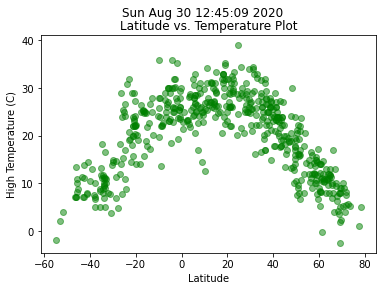

In [131]:
plt.scatter(x=clean_city_data_df["Lat"],y=clean_city_data_df["Max Temp"],c="Green",alpha=.5)
plt.ylabel("High Temperature (C)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_temp.png", bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

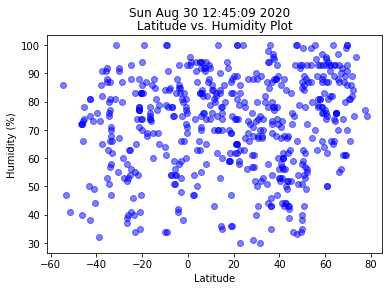

In [132]:
plt.scatter(x=clean_city_data_df["Lat"],y=clean_city_data_df["Humidity"],c="Blue",alpha=.5)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_humid.png", bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

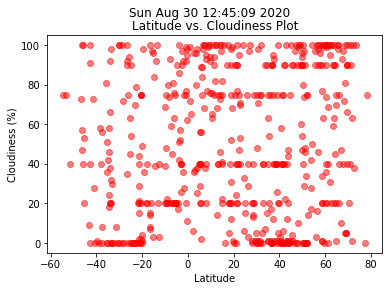

In [133]:
plt.scatter(x=clean_city_data_df["Lat"],y=clean_city_data_df["Cloudiness"],c="Red",alpha=.5)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_cloud.png", bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

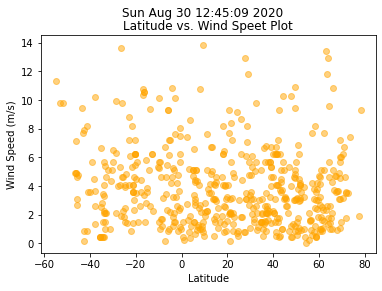

In [177]:
plt.scatter(x=clean_city_data_df["Lat"],y=clean_city_data_df["Wind Speed"],c="Orange",alpha=.5)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speet Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_wind.png", bbox_inches='tight')
plt.show()

## Linear Regression

In [178]:
# Divide the data by hemisphere.
north_df = clean_city_data_df.query("Lat >= 0")
south_df = clean_city_data_df.query("Lat <= 0")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

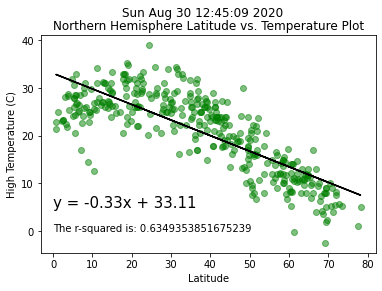

In [179]:
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="Green",alpha=.5)
plt.plot(x_values,regress_values,"r-",c="Black")
plt.annotate(line_eq,(0,5),fontsize=15,color="Black")
plt.annotate(f"The r-squared is: {rvalue**2}",(0,0),fontsize=10,color="Black")
plt.xlabel("Latitude")
plt.ylabel("High Temperature (C)")
plt.title("Northern Hemisphere Latitude vs. Temperature Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_temp_north.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

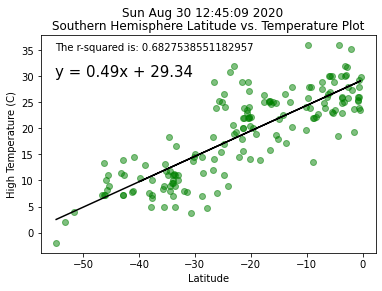

In [180]:
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="Green",alpha=.5)
plt.plot(x_values,regress_values,"r-",c="Black")
plt.annotate(line_eq,(-55,30),fontsize=15,color="Black")
plt.annotate(f"The r-squared is: {rvalue**2}",(-55,35),fontsize=10,color="Black")
plt.xlabel("Latitude")
plt.ylabel("High Temperature (C)")
plt.title("Southern Hemisphere Latitude vs. Temperature Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_temp_south.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

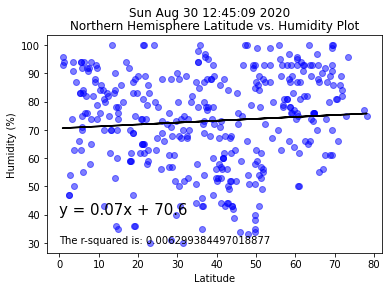

In [188]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="Blue",alpha=.5)
plt.plot(x_values,regress_values,"r-",c="Black")
plt.annotate(line_eq,(0,40),fontsize=15,color="Black")
plt.annotate(f"The r-squared is: {rvalue**2}",(0,30),fontsize=10,color="Black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Latitude vs. Humidity Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_humid_north.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

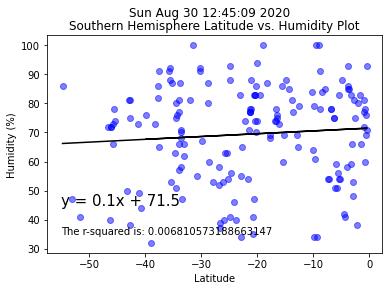

In [189]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="Blue",alpha=.5)
plt.plot(x_values,regress_values,"r-",c="Black")
plt.annotate(line_eq,(-55,45),fontsize=15,color="Black")
plt.annotate(f"The r-squared is: {rvalue**2}",(-55,35),fontsize=10,color="Black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Latitude vs. Humidity Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_humid_south.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

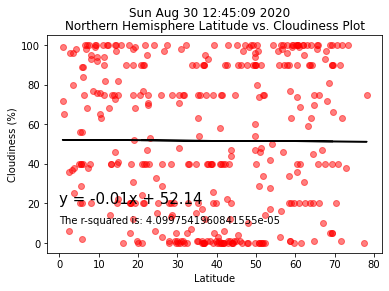

In [192]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="Red",alpha=.5)
plt.plot(x_values,regress_values,"r-",c="Black")
plt.annotate(line_eq,(0,20),fontsize=15,color="Black")
plt.annotate(f"The r-squared is: {rvalue**2}",(0,10),fontsize=10,color="Black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Latitude vs. Cloudiness Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_cloud_north.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

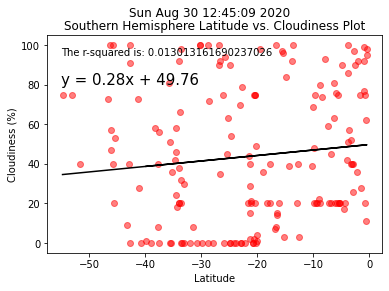

In [200]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="Red",alpha=.5)
plt.plot(x_values,regress_values,"r-",c="Black")
plt.annotate(line_eq,(-55,80),fontsize=15,color="Black")
plt.annotate(f"The r-squared is: {rvalue**2}",(-55,95),fontsize=10,color="Black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Latitude vs. Cloudiness Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_cloud_south.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

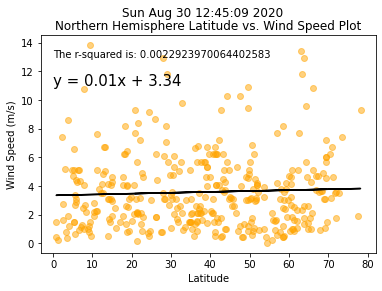

In [202]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="Orange",alpha=.5)
plt.plot(x_values,regress_values,"r-",c="Black")
plt.annotate(line_eq,(0,11),fontsize=15,color="Black")
plt.annotate(f"The r-squared is: {rvalue**2}",(0,13),fontsize=10,color="Black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere Latitude vs. Wind Speed Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_wind_north.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

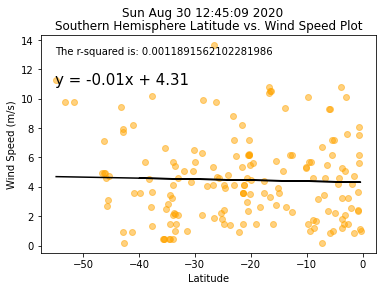

In [204]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="Orange",alpha=.5)
plt.plot(x_values,regress_values,"r-",c="Black")
plt.annotate(line_eq,(-55,11),fontsize=15,color="Black")
plt.annotate(f"The r-squared is: {rvalue**2}",(-55,13),fontsize=10,color="Black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere Latitude vs. Wind Speed Plot")
plt.suptitle(timestamp_title)
plt.savefig("lat_wind_south.png", bbox_inches='tight')
plt.show()

In [ ]:
# There is no correlation between cloudiness and latitude, wind speed and latitude, or humidity and latitude.
# The correlation between temperature and latitude is strong.